In [18]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import xesmf as xe
import cartopy
import dask
from tqdm.autonotebook import tqdm  # Fancy progress bars for our loops!
import intake
import fsspec
import requests
import aiohttp
import nc_time_axis
import cftime
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy.interpolate import interp1d

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 12, 6

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [5]:
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706


In [6]:
df_area = df.query("variable_id == 'areacella' & source_id == 'CESM2' & experiment_id =='historical'")
ds_area = xr.open_zarr(fsspec.get_mapper(df_area.zstore.values[-1]), consolidated=True)
total_area = ds_area.areacella.sum(dim=['lon', 'lat'])

In [7]:
# df_ta_ncar = df.query("activity_id=='CMIP' & table_id == 'Amon' &  source_id == 'CESM2' & variable_id == 'tas'  & institution_id == 'NCAR'")
df_tas_ncar = df.query("activity_id=='CMIP' & table_id == 'Amon' &  source_id == 'CESM2'  & variable_id == 'tas' & institution_id == 'NCAR'")

# df_ta_ncar.experiment_id.unique()
df_tas_ncar

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
53470,CMIP,NCAR,CESM2,amip,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/amip/r1i1p1f1...,NaN,20190218
55166,CMIP,NCAR,CESM2,amip,r3i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/amip/r3i1p1f1...,NaN,20190220
55264,CMIP,NCAR,CESM2,amip,r2i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/amip/r2i1p1f1...,NaN,20190220
59875,CMIP,NCAR,CESM2,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308
61655,CMIP,NCAR,CESM2,historical,r4i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r4...,NaN,20190308
61862,CMIP,NCAR,CESM2,historical,r5i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r5...,NaN,20190308
62691,CMIP,NCAR,CESM2,historical,r2i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r2...,NaN,20190308
63131,CMIP,NCAR,CESM2,historical,r3i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r3...,NaN,20190308
63266,CMIP,NCAR,CESM2,historical,r6i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r6...,NaN,20190308
64615,CMIP,NCAR,CESM2,historical,r8i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r8...,NaN,20190311


In [8]:
# df_ta_ncar = df.query("activity_id=='CMIP' & table_id == 'Amon' &  source_id == 'CESM2' & variable_id == 'tas'  & institution_id == 'NCAR'")
df_tas_ncar_his = df.query("activity_id=='CMIP' & table_id == 'Amon' &  source_id == 'CESM2'  & variable_id == 'tas' & institution_id == 'NCAR' & experiment_id == 'historical'")

# get the path to a specific zarr store (the first one from the dataframe above)
zstore_his = df_tas_ncar_his.zstore.values[-1]
print(zstore_his)

# create a mutable-mapping-style interface to the store
mapper_his = fsspec.get_mapper(zstore_his)

# open it using xarray and zarr
ds_tas_his = xr.open_zarr(mapper_his, consolidated=True)
ds_tas_his

gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r11i1p1f1/Amon/tas/gn/v20190514/


<xarray.Dataset>
Dimensions:    (lat: 192, nbnd: 2, lon: 288, time: 1980)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 dask.array<chunksize=(600, 192, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    variable_id:            tas
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/a7278f6d-6a1b-4050-8f06-a8033604736a...
    version_id:             v20190514

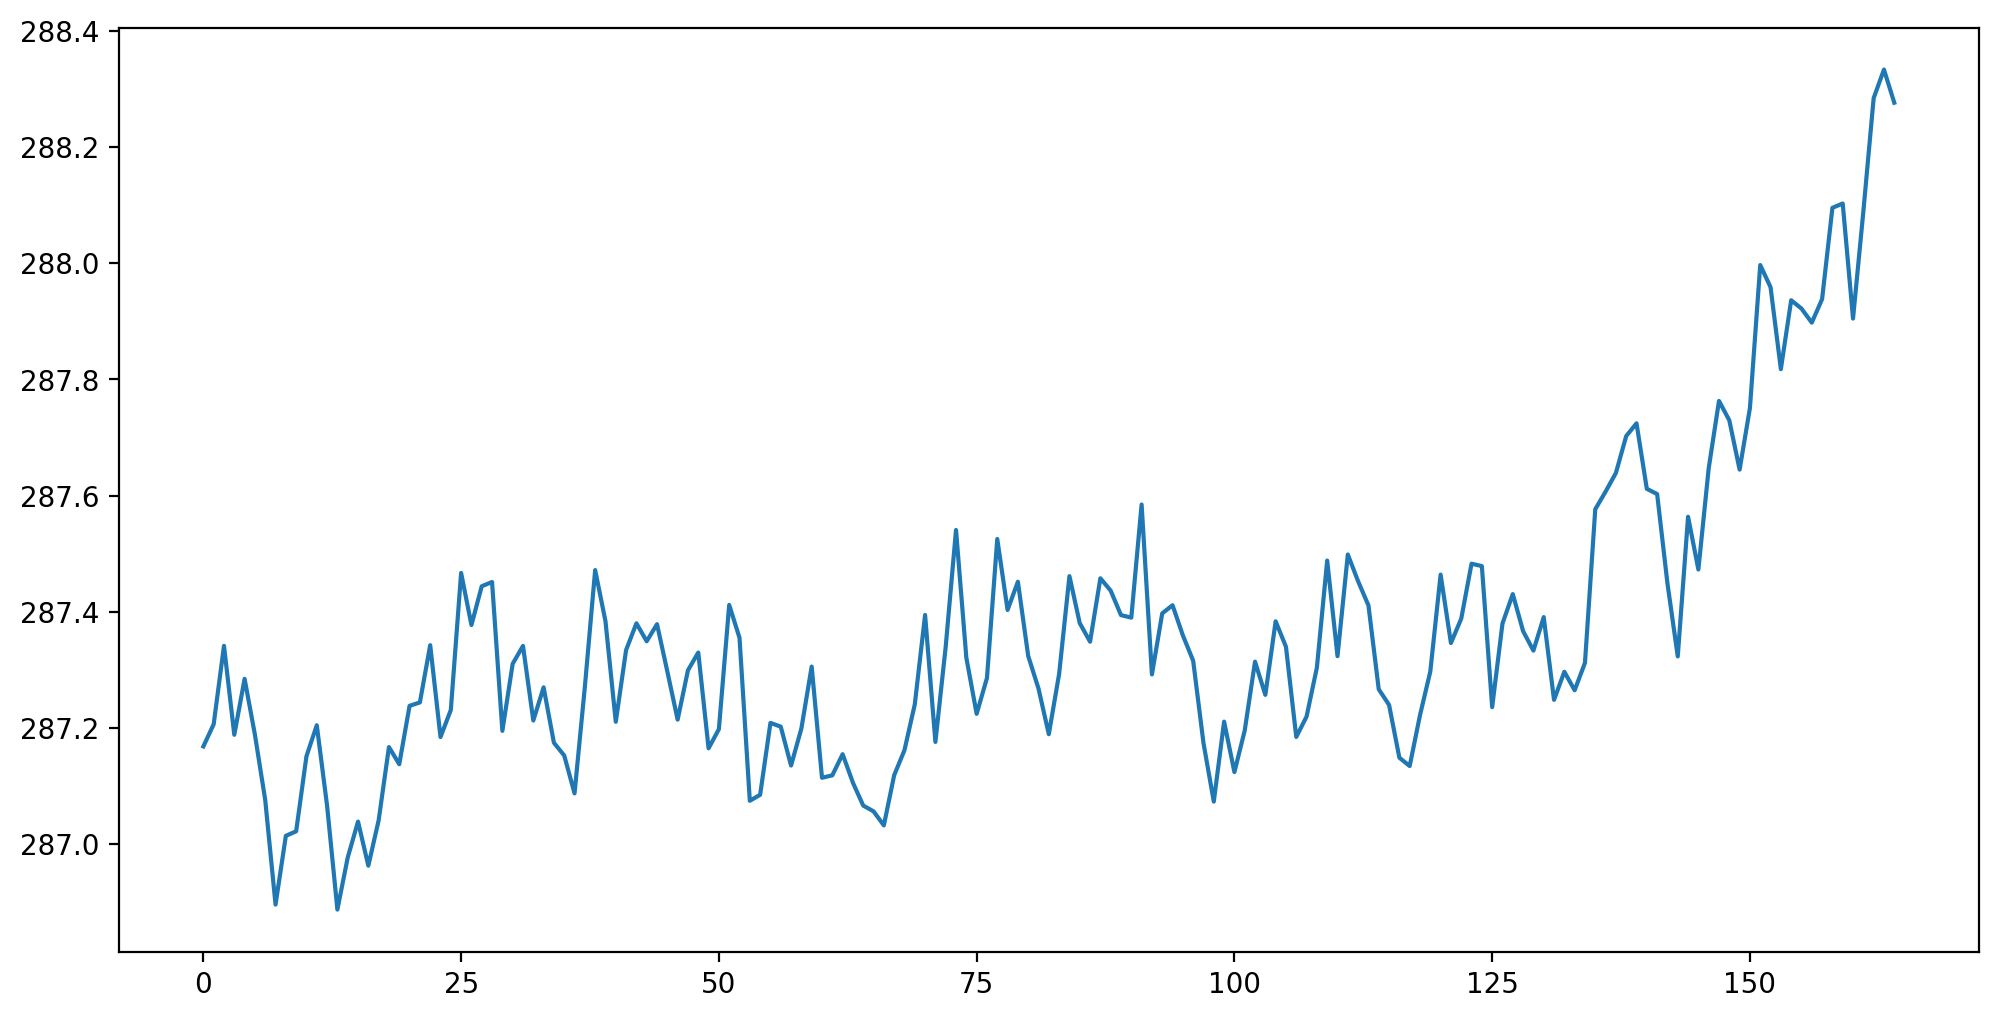

In [9]:
date_threshold = cftime.DatetimeNoLeap(1550, 1, 1)
ds_tas_his_plt = ds_tas_his.where(ds_tas_his.time > date_threshold, drop=True)
tas_timeseries_his = (ds_tas_his_plt.tas * ds_area.areacella).sum(dim=['lon', 'lat']) / total_area
array_tas_ts = np.array(tas_timeseries_his)
year_tas_ts = np.mean(array_tas_ts.reshape(1980//12, 12), axis=1)
plt.plot(year_tas_ts)
plt.show()

In [10]:
df_co2_ncar = df.query("activity_id=='CMIP' & table_id == 'Amon' &  source_id == 'CESM2'  & variable_id == 'co2' & institution_id == 'NCAR'")
df_co2_ncar_his = df.query("activity_id=='CMIP' & table_id == 'Amon' &  source_id == 'CESM2'  & variable_id == 'co2' & institution_id == 'NCAR' & experiment_id == 'historical'")

# get the path to a specific zarr store (the first one from the dataframe above)
zstore_his = df_co2_ncar_his.zstore.values[-1]
print(zstore_his)

# create a mutable-mapping-style interface to the store
mapper_his = fsspec.get_mapper(zstore_his)

# open it using xarray and zarr
ds_co2_his = xr.open_zarr(mapper_his, consolidated=True)
date_threshold = cftime.DatetimeNoLeap(1550, 1, 1)
ds_co2_his_plt = ds_co2_his.where(ds_co2_his.time > date_threshold, drop=True)
ds_co2_his_plt

gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r4i1p1f1/Amon/co2/gn/v20191105/


<xarray.Dataset>
Dimensions:    (time: 1980, plev: 19, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    co2        (time, plev, lat, lon) float32 dask.array<chunksize=(68, 19, 192, 288), meta=np.ndarray>
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  182500.0
    case_id:                18
    ...                     ...
    tracking_id:            hdl:21.14100/0ff3a523-63b9-455f-9d61-dd3f71732764
    variable_id:            co2
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r4i1p1f1
    netcdf_tracking_ids:    hdl:21.14100/0ff3a523-63b9-455f-9d61-dd3f71732764
    version_id:             v20191105

In [11]:
# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'
# plt.rcParams['figure.figsize'] = 12, 6
# ds_co2_his_plt.co2.sel(time='1850-01').sel(plev=50000).squeeze().plot()

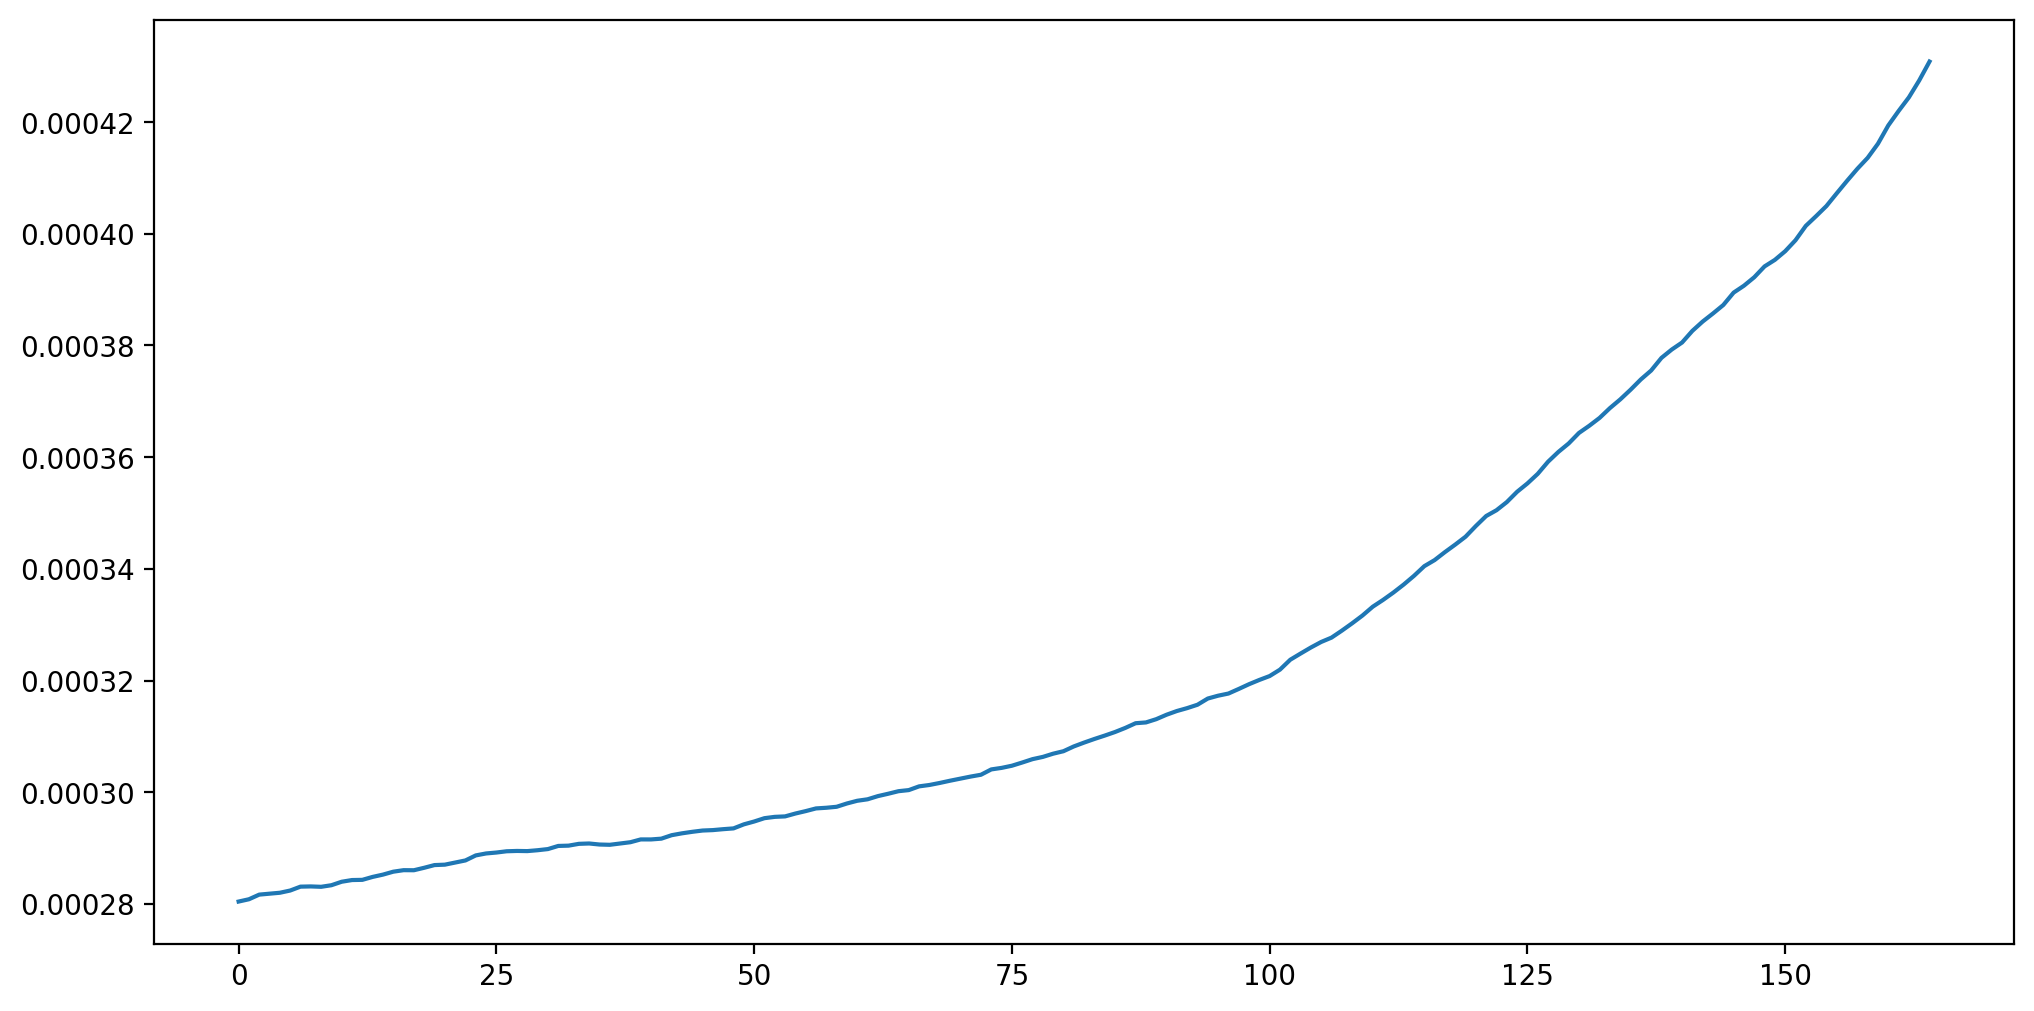

In [12]:
ds_co2_his_plt_500 = ds_co2_his_plt.sel(plev=50000).drop_vars("plev")
ds_co2_his_plt_500
co2_timeseries_his = (ds_co2_his_plt_500.co2 * ds_area.areacella).sum(dim=['lon', 'lat']) / total_area
array_co2_ts = np.array(co2_timeseries_his)
year_co2_ts = np.mean(array_co2_ts.reshape(1980//12, 12), axis=1)
plt.plot(year_co2_ts)
plt.show()

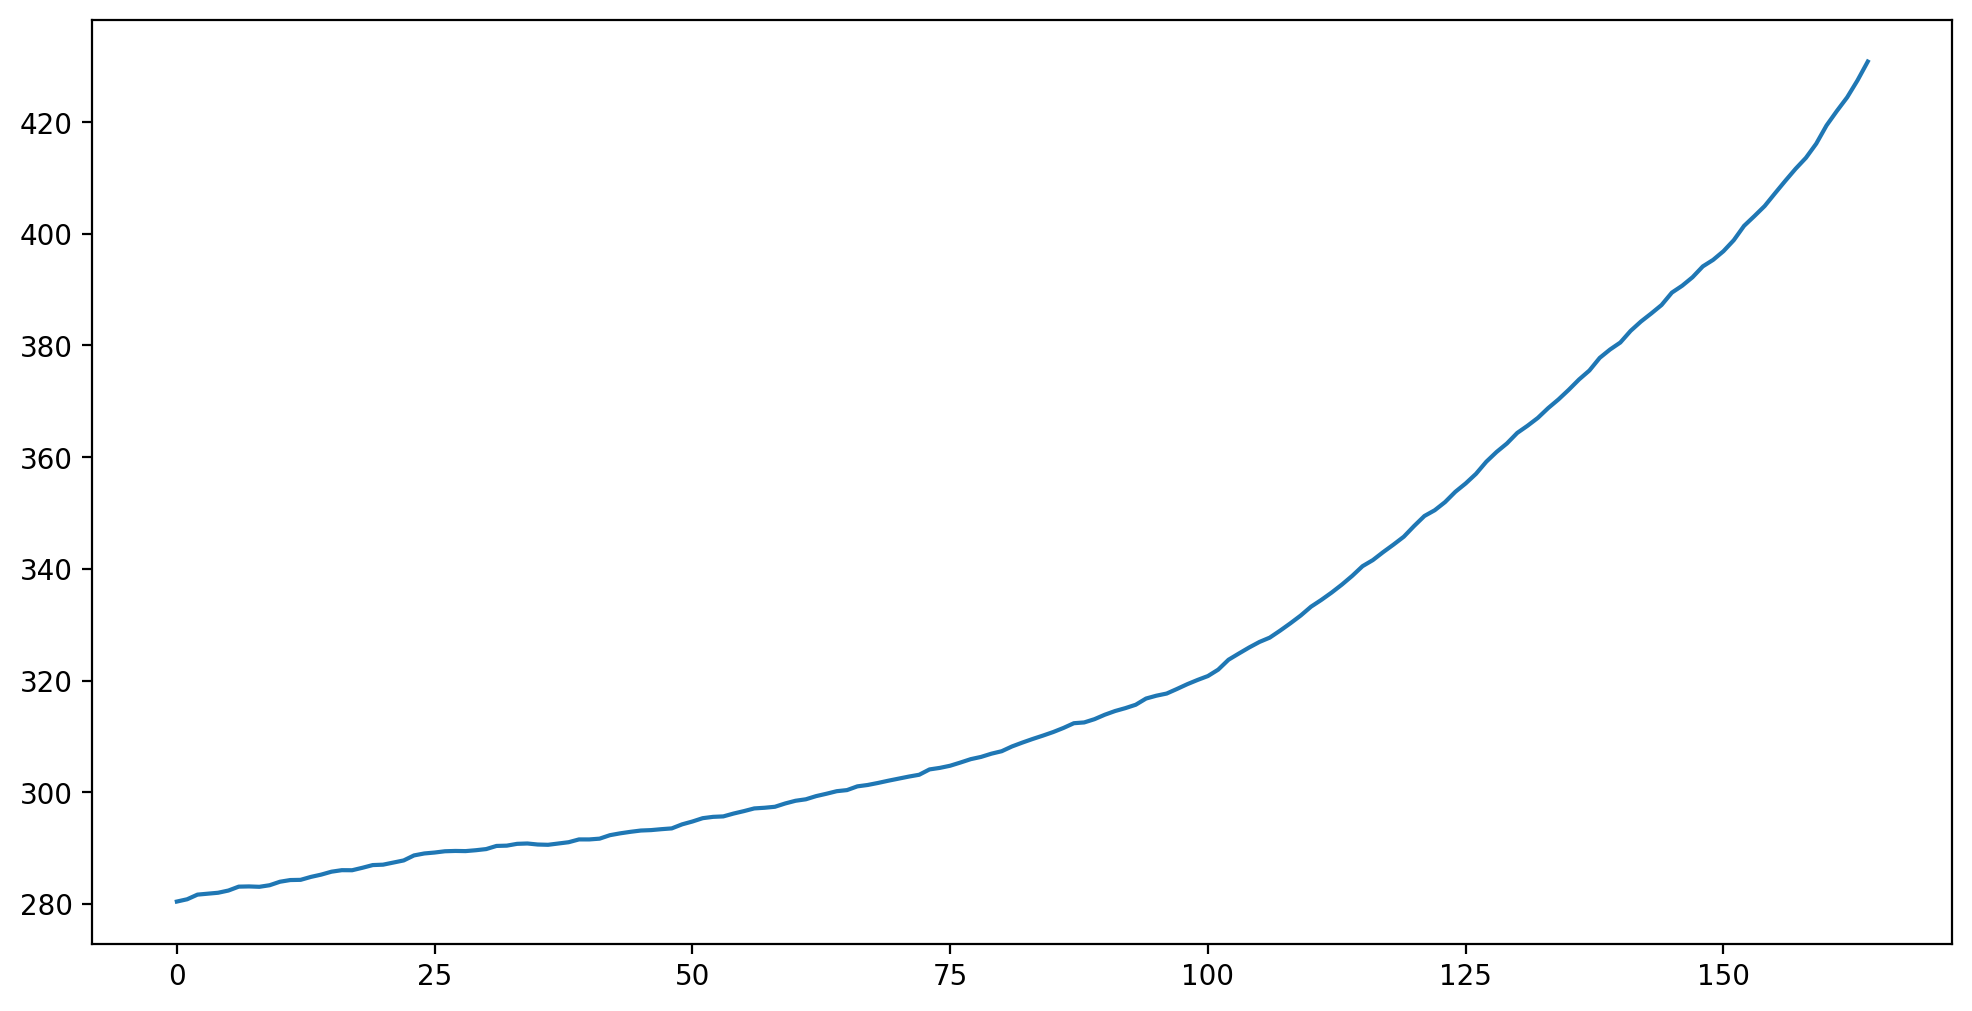

In [14]:
year_co2_ts = year_co2_ts * 1000000
plt.plot(year_co2_ts)
plt.show()

Optimized C (heat capacity): 7.42
Optimized lambda (feedback parameter): 0.10


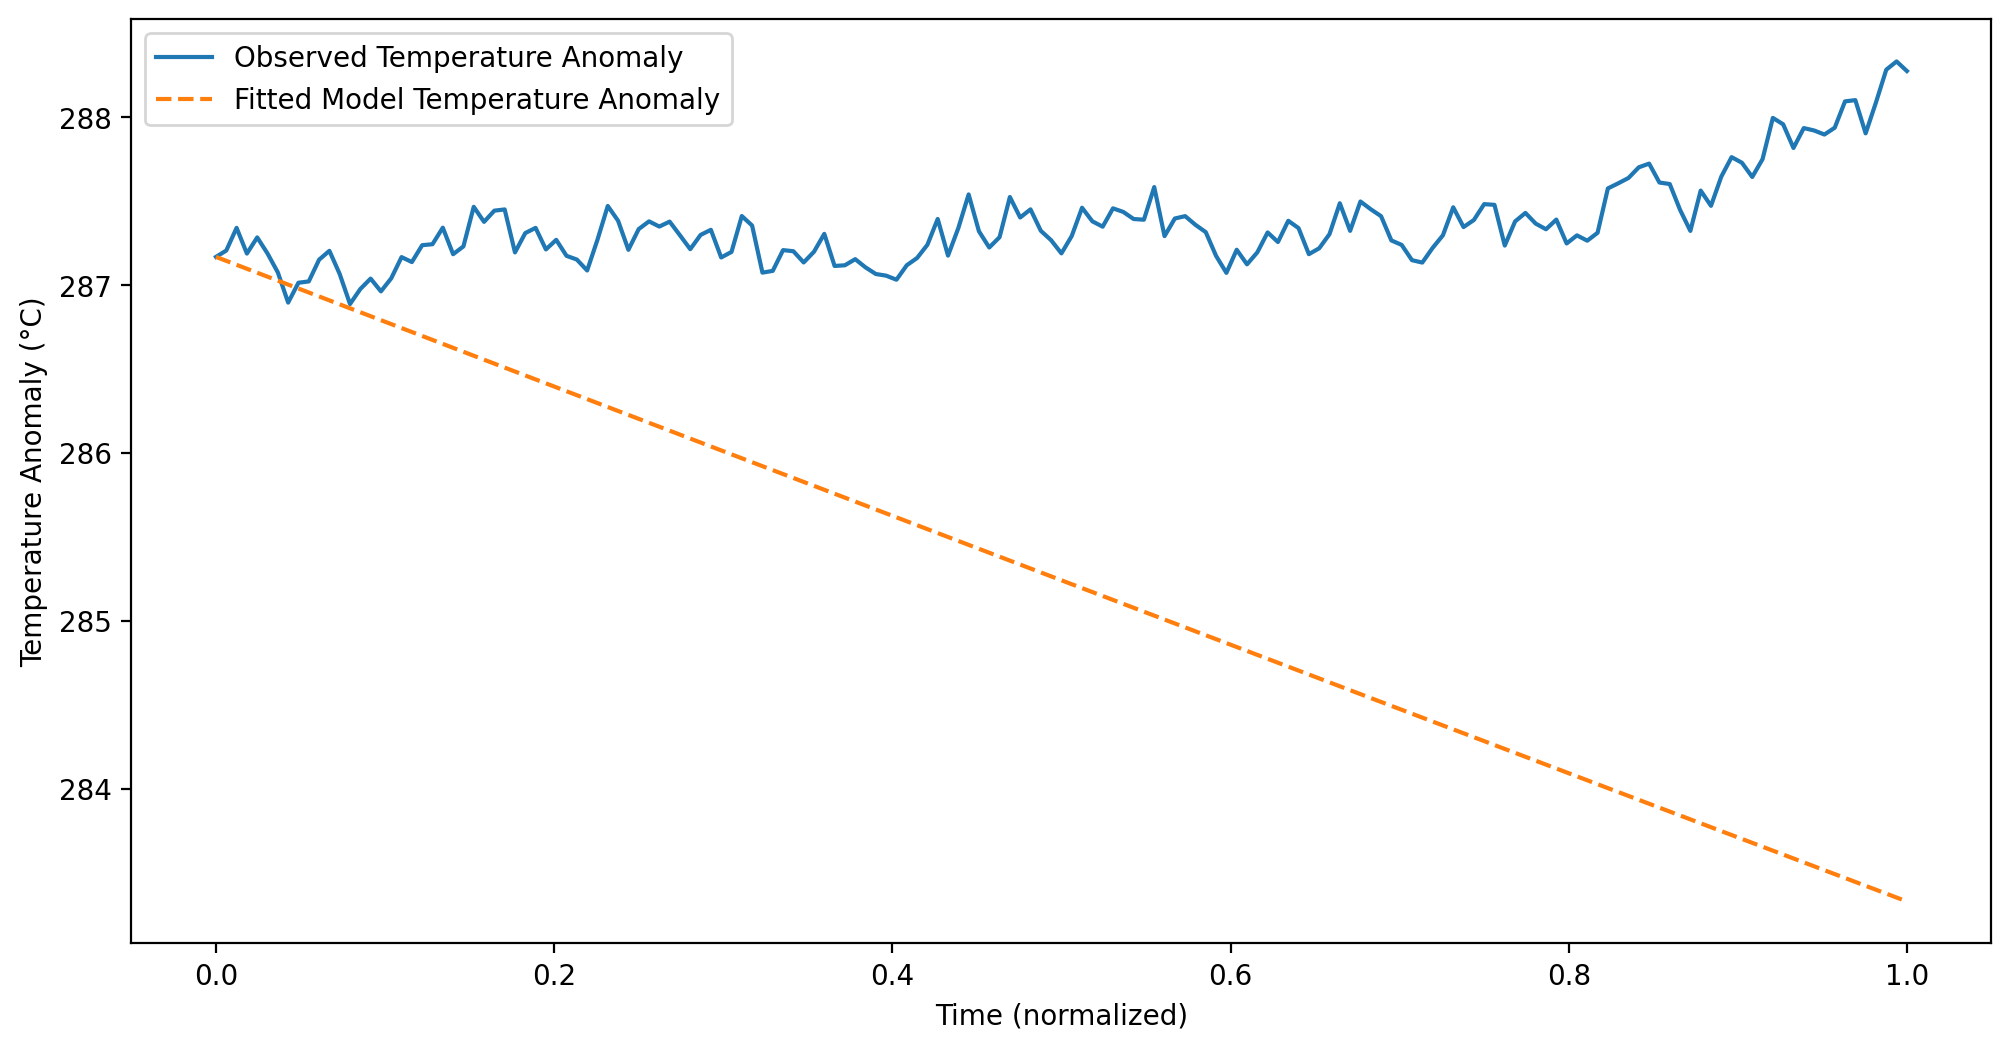

In [ ]:
# Empirical function to calculate radiative forcing based on CO2 concentration
def calculate_forcing(C, C0=280):
    return 5.35 * np.log(C / C0)

# Interpolation function for CO2 data to handle non-integer time values
def get_interpolated_co2(t, co2_data):
    time_indices = np.arange(len(co2_data))
    co2_interp_func = interp1d(time_indices, co2_data, fill_value="extrapolate")
    return co2_interp_func(t)

# Differential equation model for global warming
def climate_model(T, t, C, lambda_param, forcing_func, co2_data):
    # Ensure that we get interpolated CO2 concentration if t is fractional
    co2_concentration = get_interpolated_co2(t, co2_data)
    F = forcing_func(co2_concentration)  # Calculate forcing based on interpolated CO2
    dTdt = (F - lambda_param * T) / C
    return dTdt

# Objective function for optimization with a regularization term to avoid zero values
def objective_function(params, t, T_obs, co2_data):
    C, lambda_param = params
    T0 = T_obs[0]  # Initial temperature anomaly

    # Solve the differential equation with the provided parameters
    T_model = odeint(climate_model, T0, t, args=(C, lambda_param, calculate_forcing, co2_data)).flatten()
    
    # Calculate the mean squared error between model and observed data with regularization
    mse = np.mean((T_model - T_obs) ** 2) + 0.1 * (C ** 2 + lambda_param ** 2)  # Regularization term
    return mse

# Example data setup (replace this with actual time series data)
# t: time in years, co2_data: CO2 concentration in ppm, T_obs: observed temperature anomaly
co2_data = year_co2_ts.copy()
T_obs = year_tas_ts.copy()
t = np.linspace(0, len(co2_data) - 1, len(co2_data))  # Time in years

# Normalize time to avoid large values if needed
t = (t - t.min()) / (t.max() - t.min())

# Initial parameter guesses for C and lambda
initial_params = [50, 1]  # Adjusted initial guesses for heat capacity and feedback parameter

# Add bounds to keep parameters in realistic ranges
bounds = [(1, 1000), (0.1, 5)]  # UN-Reasonable bounds for C and lambda

# Perform optimization to find the best-fit parameters
result = minimize(objective_function, initial_params, args=(t, T_obs, co2_data), method='L-BFGS-B', bounds=bounds)

# Extract optimized parameters
C_opt, lambda_opt = result.x
print(f"Optimized C (heat capacity): {C_opt:.2f}")
print(f"Optimized lambda (feedback parameter): {lambda_opt:.2f}")

# Solve the differential equation using optimized parameters for plotting
T_model = odeint(climate_model, T_obs[0], t, args=(C_opt, lambda_opt, calculate_forcing, co2_data)).flatten()

# Plot the observed and fitted temperature anomaly
plt.plot(t, T_obs, label='Observed Temperature Anomaly')
plt.plot(t, T_model, label='Fitted Model Temperature Anomaly', linestyle='--')
plt.xlabel('Time (normalized)')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.show()


Optimized C (heat capacity): 10.10
Optimized lambda (feedback parameter): -0.02
Optimized alpha (radiative forcing coefficient): 5.35


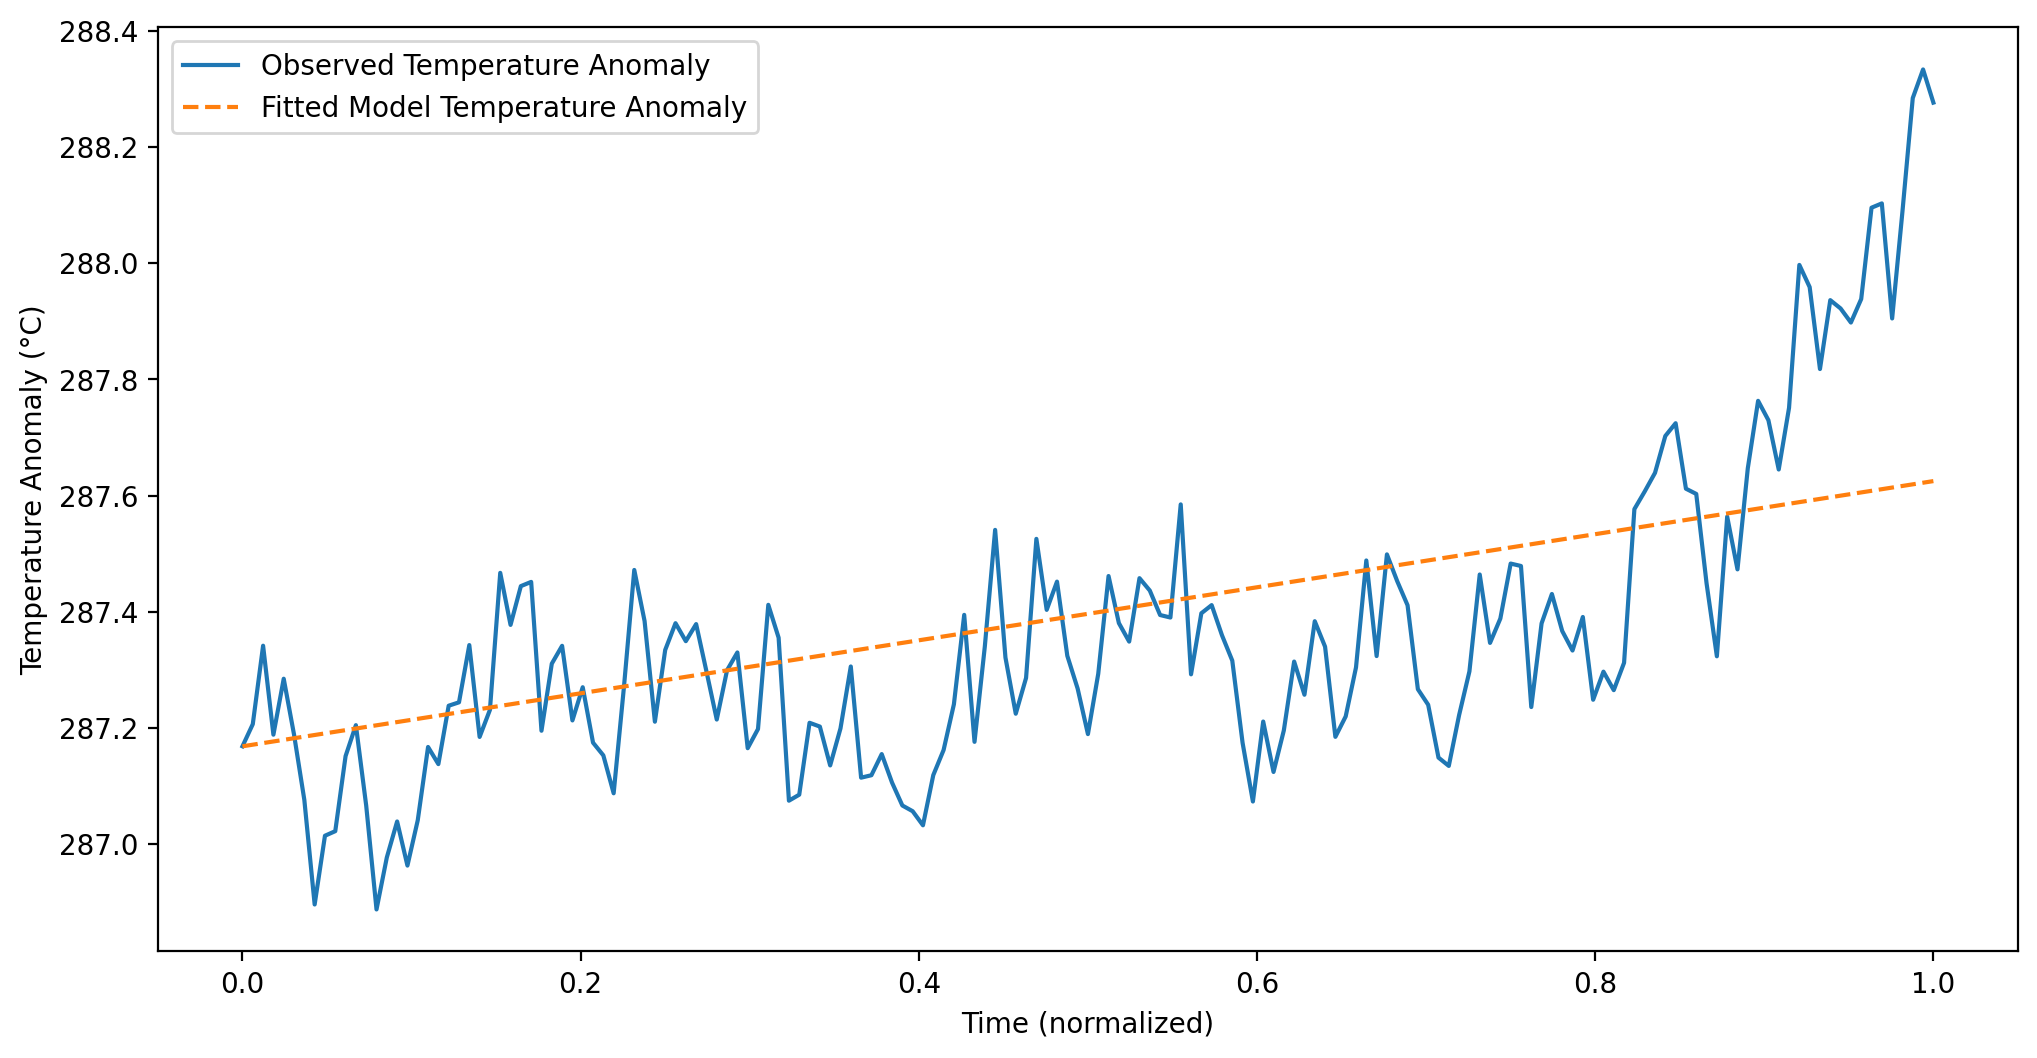

In [ ]:
# Modified empirical function to calculate radiative forcing with parameter alpha
def calculate_forcing(C, alpha, C0=280):
    return alpha * np.log(C / C0)

# Interpolation function for CO2 data to handle non-integer time values
def get_interpolated_co2(t, co2_data):
    time_indices = np.arange(len(co2_data))
    co2_interp_func = interp1d(time_indices, co2_data, fill_value="extrapolate")
    return co2_interp_func(t)

# Differential equation model for global warming
def climate_model(T, t, C, lambda_param, alpha, forcing_func, co2_data):
    # Ensure that we get interpolated CO2 concentration if t is fractional
    co2_concentration = get_interpolated_co2(t, co2_data)
    F = forcing_func(co2_concentration, alpha)  # Calculate forcing based on interpolated CO2 and alpha
    dTdt = (F - lambda_param * T) / C
    return dTdt

# Objective function for optimization with alpha as an additional parameter
def objective_function(params, t, T_obs, co2_data):
    C, lambda_param, alpha = params
    T0 = T_obs[0]  # Initial temperature anomaly

    # Solve the differential equation with the provided parameters
    T_model = odeint(climate_model, T0, t, args=(C, lambda_param, alpha, calculate_forcing, co2_data)).flatten()
    
    # Calculate the mean squared error between model and observed data
    mse = np.mean((T_model - T_obs) ** 2)
    return mse

# Example data setup (replace this with actual time series data)
# t: time in years, co2_data: CO2 concentration in ppm, T_obs: observed temperature anomaly
co2_data = year_co2_ts.copy()
T_obs = year_tas_ts.copy()
t = np.linspace(0, len(co2_data) - 1, len(co2_data))  # Time in years

# Normalize time to avoid large values if needed
t = (t - t.min()) / (t.max() - t.min())

# Initial parameter guesses for C, lambda, and alpha
initial_params = [10, 1, 5.35]  # Initial guesses for heat capacity, feedback parameter, and alpha

# Add bounds to keep parameters in realistic ranges
bounds = [(1, 100), (0.1, 2), (4, 6)]  # Realistic bounds for C, lambda, and alpha

# Perform optimization to find the best-fit parameters
result = minimize(objective_function, initial_params, args=(t, T_obs, co2_data), method='L-BFGS-B')

# Extract optimized parameters
C_opt, lambda_opt, alpha_opt = result.x
print(f"Optimized C (heat capacity): {C_opt:.2f}")
print(f"Optimized lambda (feedback parameter): {lambda_opt:.2f}")
print(f"Optimized alpha (radiative forcing coefficient): {alpha_opt:.2f}")

# Solve the differential equation using optimized parameters for plotting
T_model = odeint(climate_model, T_obs[0], t, args=(C_opt, lambda_opt, alpha_opt, calculate_forcing, co2_data)).flatten()

# Plot the observed and fitted temperature anomaly
plt.plot(t, T_obs, label='Observed Temperature Anomaly')
plt.plot(t, T_model, label='Fitted Model Temperature Anomaly', linestyle='--')
plt.xlabel('Time (normalized)')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.show()


Optimized C (heat capacity): 8.00
Optimized lambda (feedback parameter): 1.20
Optimized alpha (radiative forcing coefficient): 5.35


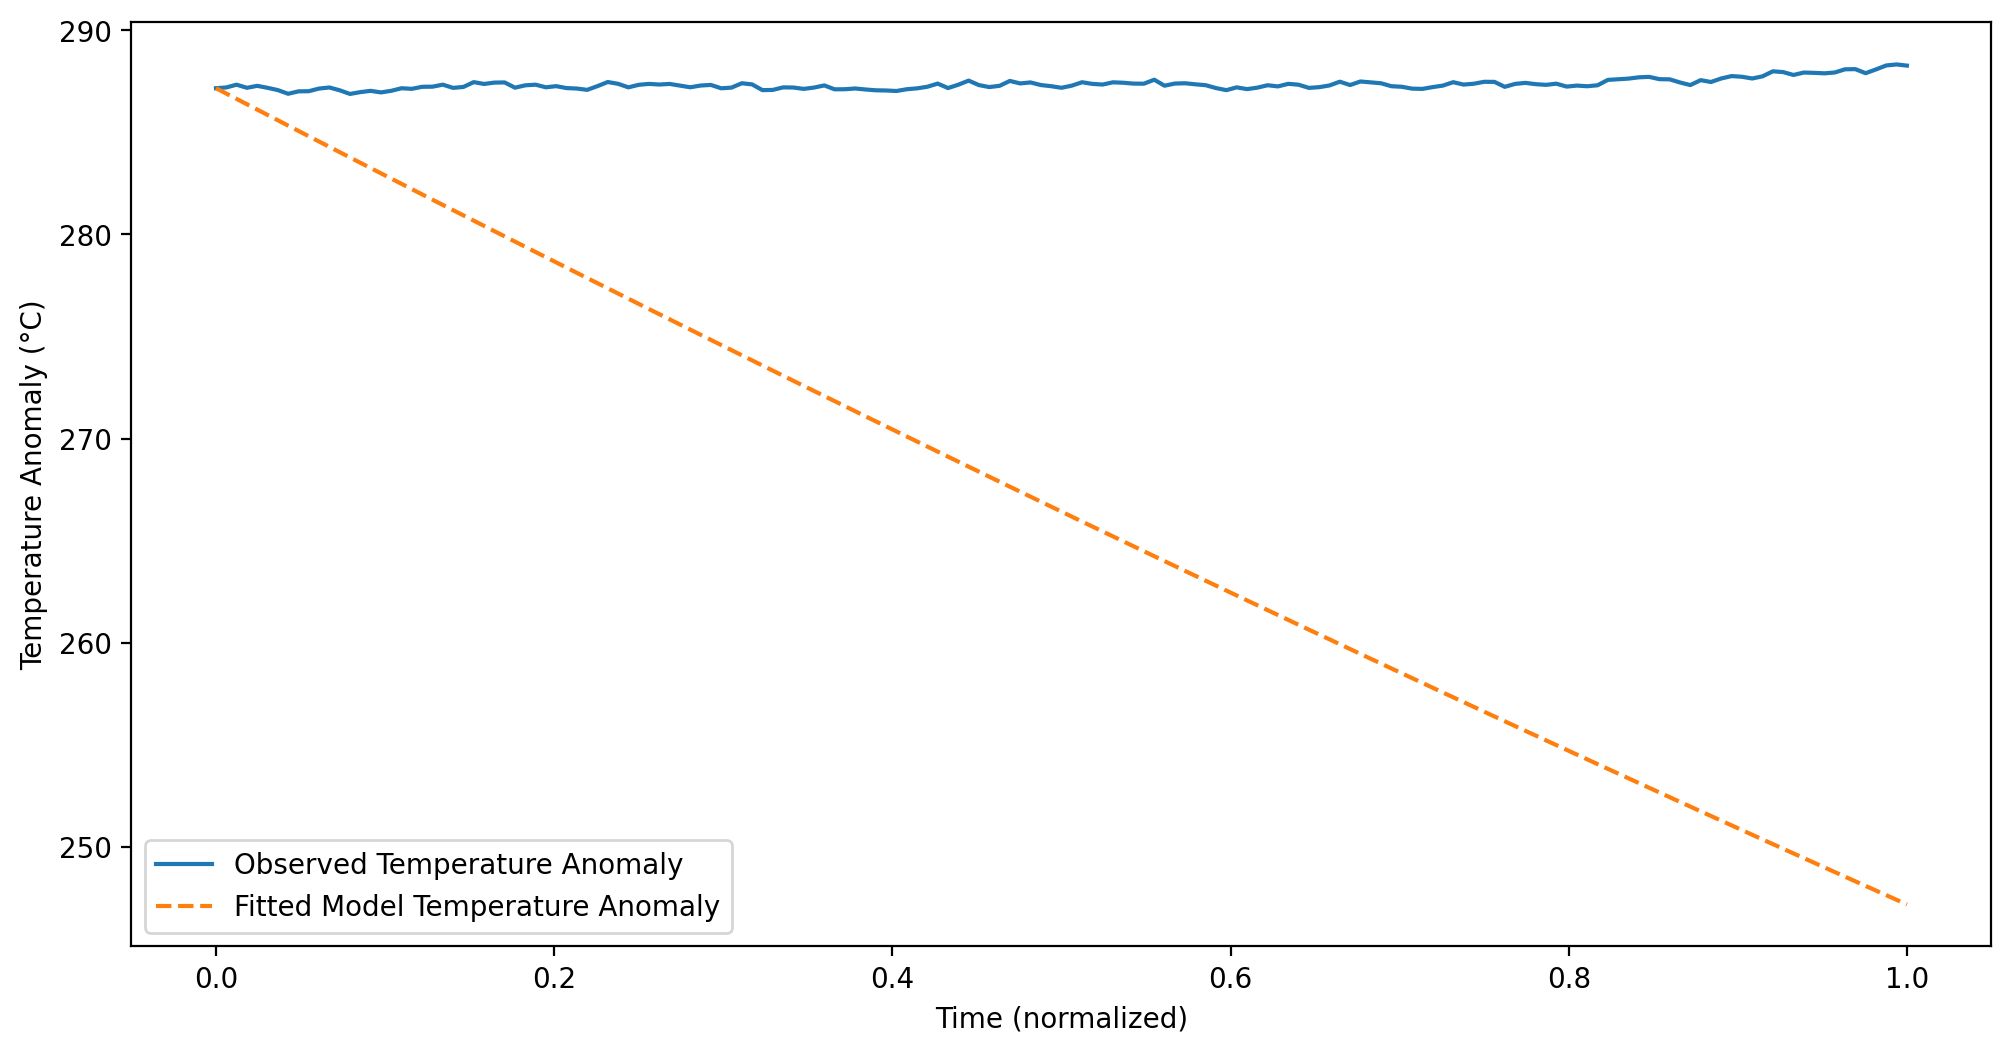

In [20]:
C_opt, lambda_opt, alpha_opt = 8.0, 1.2, 5.35
print(f"Optimized C (heat capacity): {C_opt:.2f}")
print(f"Optimized lambda (feedback parameter): {lambda_opt:.2f}")
print(f"Optimized alpha (radiative forcing coefficient): {alpha_opt:.2f}")

# Solve the differential equation using optimized parameters for plotting
T_model = odeint(climate_model, T_obs[0], t, args=(C_opt, lambda_opt, alpha_opt, calculate_forcing, co2_data)).flatten()

# Plot the observed and fitted temperature anomaly
plt.plot(t, T_obs, label='Observed Temperature Anomaly')
plt.plot(t, T_model, label='Fitted Model Temperature Anomaly', linestyle='--')
plt.xlabel('Time (normalized)')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.show()

In [61]:
co2_mean_notnull = co2_timeseries_his_mean[11:]
array_co2_mean_notnull = co2_mean_notnull.to_numpy()
array_co2_mean_notnull

array([0.00028044, 0.00028046, 0.00028049, ..., 0.00043036, 0.00043061,
       0.00043084], dtype=float32)

In [62]:
len(array_co2_mean_notnull)

1969

#### use rolling 12:

Text(0.5, 1.0, 'Global Mean Surface Air Temperature')

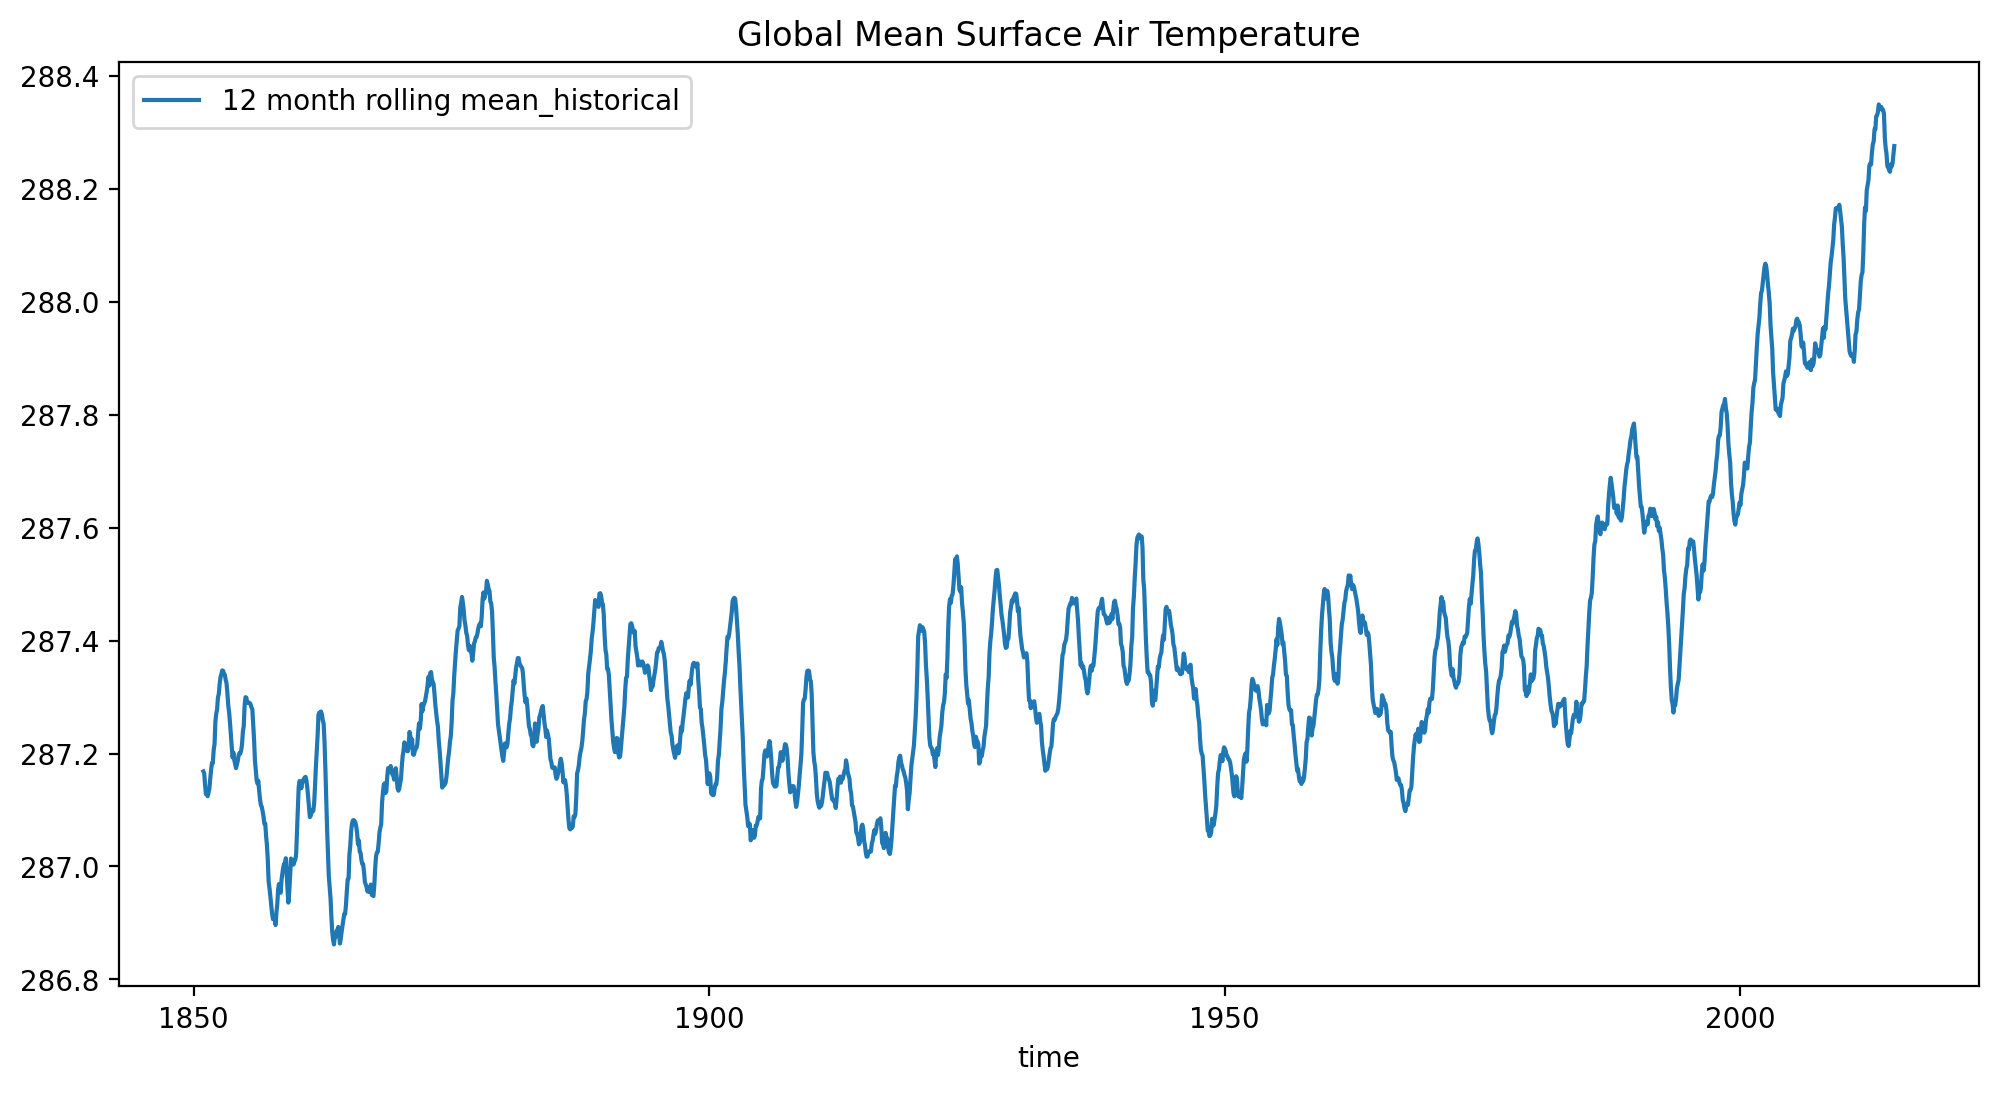

In [91]:
tas_timeseries_his = (ds_tas_his_plt.tas * ds_area.areacella).sum(dim=['lon', 'lat']) / total_area
tas_timeseries_his.rolling(time=12).mean().plot(label='12 month rolling mean_historical')
plt.legend()
plt.title('Global Mean Surface Air Temperature')

In [ ]:
# ds_co2_his_plt_500 = ds_co2_his_plt.sel(plev=50000)
# co2_timeseries_his = (ds_co2_his_plt_500.co2 * ds_area.areacella).sum(dim=['lon', 'lat']) / total_area
# # co2_timeseries_his.plot(label='monthly')
# co2_timeseries_his_mean = co2_timeseries_his.rolling(time=12).mean()
# co2_timeseries_his_mean.plot()

In [ ]:


# tas_timeseries_his = (ds_tas_his_plt.tas * ds_area.areacella).sum(dim=['lon', 'lat']) / total_area
# tas_timeseries_his.rolling(time=12).mean().plot(label='tas 12 month rolling mean_historical')
# co2_timeseries_his = (ds_co2_his_plt_500.co2 * ds_area.areacella).sum(dim=['lon', 'lat']) / total_area
# co2_timeseries_his.rolling(time=12).mean().plot(label='co2 12 month rolling mean_historical')
# plt.legend()
# plt.title('Global Mean Surface Air Temperature')

In [ ]:
%time drop_vars.load()

CPU times: user 21.3 s, sys: 12.3 s, total: 33.6 s
Wall time: 1min 21s


<xarray.DataArray (time: 1980)>
array([0.00028053, 0.00028063, 0.00028084, ..., 0.00043079, 0.00043159,
       0.0004322 ], dtype=float32)
Coordinates:
  * time     (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00

In [ ]:
array_co2_mean = np.array(co2_timeseries_his_mean)

In [ ]:
pd.DataFrame(array_co2_mean).head()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [ ]:
# Empirical function to calculate radiative forcing based on CO2 concentration
def calculate_forcing(C, C0=280):
    return 5.35 * np.log(C / C0)

# Interpolation function for CO2 data to handle non-integer time values
def get_interpolated_co2(t, co2_data):
    time_indices = np.arange(len(co2_data))
    co2_interp_func = interp1d(time_indices, co2_data, fill_value="extrapolate")
    return co2_interp_func(t)

# Differential equation model for global warming
def climate_model(T, t, C, lambda_param, forcing_func, co2_data):
    # Ensure that we get interpolated CO2 concentration if t is fractional
    co2_concentration = get_interpolated_co2(t, co2_data)
    F = forcing_func(co2_concentration)  # Calculate forcing based on interpolated CO2
    dTdt = (F - lambda_param * T) / C
    return dTdt

# Objective function for optimization
def objective_function(params, t, T_obs, co2_data):
    C, lambda_param = params
    T0 = T_obs[0]  # Initial temperature anomaly

    # Solve the differential equation with the provided parameters
    T_model = odeint(climate_model, T0, t, args=(C, lambda_param, calculate_forcing, co2_data)).flatten()
    
    # Calculate the mean squared error between model and observed data
    mse = np.mean((T_model - T_obs) ** 2)
    return mse

# Example data setup (replace this with actual time series data)
# t: time in years, co2_data: CO2 concentration in ppm, T_obs: observed temperature anomaly
co2_data = year_co2_ts.copy()
T_obs = year_tas_ts.copy()
t = np.linspace(0, len(co2_data) - 1, len(co2_data))  # Time in years

# Initial parameter guesses for C and lambda
initial_params = [10, 1]  # Initial guesses for heat capacity and feedback parameter

# Perform optimization to find the best-fit parameters
result = minimize(objective_function, initial_params, args=(t, T_obs, co2_data), method='L-BFGS-B')

# Extract optimized parameters
C_opt, lambda_opt = result.x
print(f"Optimized C (heat capacity): {C_opt:.2f}")
print(f"Optimized lambda (feedback parameter): {lambda_opt:.2f}")

# Solve the differential equation using optimized parameters for plotting
T_model = odeint(climate_model, T_obs[0], t, args=(C_opt, lambda_opt, calculate_forcing, co2_data)).flatten()

# Plot the observed and fitted temperature anomaly
plt.plot(t, T_obs, label='Observed Temperature Anomaly')
plt.plot(t, T_model, label='Fitted Model Temperature Anomaly', linestyle='--')
plt.xlabel('Time (years)')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.show()
